In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import math
df = pd.read_csv('baseDeDados.csv', sep=';')
df.head()

,id,ano_nascimento_discente,idade_conclusao_ensino_medio,idade_ingresso_universidade,idade_colacao_grau,uf_naturalidade_discente,discente_estudou_escola_publica?,ano_conclusao_ensino_medio,nome_municipio_curso,nome_campus_curso,...,semestre_previsto_componente,ch_total_componente,frequencia_discente_componente,nota_discente_componente,situacao_discente_componente,quantidade_trancamentos,quantidade_reprovacoes_nc,quantidade_reprovacoes_nl,quantidade_reprovacoes_neobr,quantidade_reprovacoes_neopt
0,1,1989,17.0,19,26.0,GO,NÃO,2006.0,GOIÂNIA,SAMAMBAIA,...,1,64,0.91,7.3,AP,1.0,6.0,9.0,10.0,NaN
1,1,1989,17.0,19,26.0,GO,NÃO,2006.0,GOIÂNIA,SAMAMBAIA,...,1,64,0.91,6.8,AP,1.0,6.0,9.0,10.0,NaN
2,1,1989,17.0,19,26.0,GO,NÃO,2006.0,GOIÂNIA,SAMAMBAIA,...,1,64,1.00,5.0,AP,1.0,6.0,9.0,10.0,NaN
3,1,1989,17.0,19,26.0,GO,NÃO,2006.0,GOIÂNIA,SAMAMBAIA,...,2,64,0.94,5.0,AP,1.0,6.0,9.0,10.0,NaN
4,1,1989,17.0,19,26.0,GO,NÃO,2006.0,GOIÂNIA,SAMAMBAIA,...,2,64,0.91,4.2,RM,1.0,6.0,9.0,10.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22362 entries, 0 to 22361
Data columns (total 66 columns):
id                                            22362 non-null int64
ano_nascimento_discente                       22362 non-null int64
idade_conclusao_ensino_medio                  18632 non-null float64
idade_ingresso_universidade                   22362 non-null int64
idade_colacao_grau                            8223 non-null float64
uf_naturalidade_discente                      22204 non-null object
discente_estudou_escola_publica?              21326 non-null object
ano_conclusao_ensino_medio                    18632 non-null float64
nome_municipio_curso                          22362 non-null object
nome_campus_curso                             22362 non-null object
nome_curso                                    22362 non-null object
grau_academico                                22362 non-null object
modalidade                                    22362 non-null object
turno   

In [4]:
# 1.Número de reprovações por disciplinas.

import numpy as np
cols = ['id', 'quantidade_reprovacoes_nc', 'quantidade_reprovacoes_nl', 'quantidade_reprovacoes_neobr', 'quantidade_reprovacoes_neopt']
nr = df[cols].drop_duplicates()

reprovacoes = [ [ x[1] for x in list(row.items())[1:] ] for index,row in nr.iterrows() ]
reprovacoes = [ np.sum(np.nan_to_num(x)) for x in reprovacoes ]
nr['reprovacoes'] = reprovacoes
nr = nr[['id', 'reprovacoes']]
nr.sample(10)

,id,reprovacoes
22103,796,5.0
21037,680,0.0
16091,468,17.0
6661,186,14.0
22023,785,3.0
17540,518,8.0
21392,711,12.0
21905,770,2.0
7060,198,7.0
3209,80,16.0


Text(0.5, 1.0, 'Distribuição do número de reprovações por disciplina')

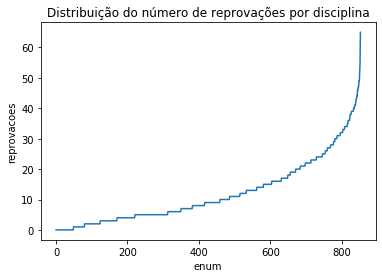

In [5]:
resultado_plot = nr.sort_values(by='reprovacoes')[['reprovacoes']]
resultado_plot = resultado_plot.reset_index()
resultado_plot['enum'] = resultado_plot.index

sns.lineplot(x='enum', y='reprovacoes',data=resultado_plot).set_title('Distribuição do número de reprovações por disciplina')

In [6]:
# 2.Média dos alunos por disciplina.

aluno_avg = df[['id', 'nome_componente', 'nota_discente_componente']]
aluno_sum = aluno_avg.groupby('nome_componente').sum()
aluno_count = aluno_avg.groupby('nome_componente').count()

media_disc = aluno_sum['nota_discente_componente'] / aluno_count['nota_discente_componente']
resultado = pd.DataFrame(media_disc)
resultado.head()

,nota_discente_componente
nome_componente,
ALGORITMOS E ESTRUTURAS DE DADOS 1,6.560784
ALGORITMOS E ESTRUTURAS DE DADOS 2,5.973333
ANÁLISE E PROJETO DE ALGORITMOS,4.335073
ARQUITETURA DE COMPUTADORES,5.525963
BANCO DE DADOS,5.265583


Text(0.5, 1.0, 'Distribuição da média da turma em cada disciplina')

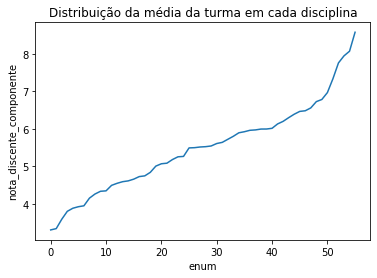

In [7]:
resultado_plot = resultado.sort_values(by='nota_discente_componente')[['nota_discente_componente']]
resultado_plot = resultado_plot.reset_index()
resultado_plot['enum'] = resultado_plot.index

sns.lineplot(x='enum', y='nota_discente_componente',data=resultado_plot).set_title('Distribuição da média da turma em cada disciplina')

In [8]:
# 3.Número médio de reprovações/semestre por disciplina.

alunos_tabela = df[['id', 'nome_componente', 'nota_discente_componente', 'semestre_cursado']]

ndc = alunos_tabela['nota_discente_componente']
alunos_tabela['nota_discente_componente'] = ndc.apply(lambda x: 1 if x < 6.0 else 0)

notas = alunos_tabela.groupby(by=['nome_componente', 'semestre_cursado']).sum().groupby('nome_componente').mean()
media_de_reprovacoes = notas[['nota_discente_componente']]
resultado = media_de_reprovacoes
resultado.head()

,nota_discente_componente
nome_componente,
ALGORITMOS E ESTRUTURAS DE DADOS 1,3.000000
ALGORITMOS E ESTRUTURAS DE DADOS 2,1.250000
ANÁLISE E PROJETO DE ALGORITMOS,16.411765
ARQUITETURA DE COMPUTADORES,22.416667
BANCO DE DADOS,17.625000


Text(0.5, 1.0, 'Distribuição da média de reprovações em cada disciplina')

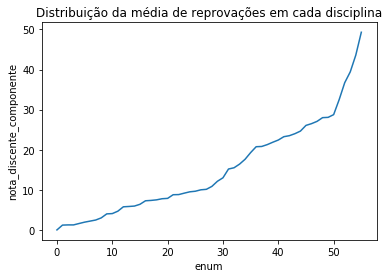

In [9]:

resultado_plot = resultado.sort_values(by='nota_discente_componente')[['nota_discente_componente']]
resultado_plot = resultado_plot.reset_index()
resultado_plot['enum'] = resultado_plot.index
resultado_plot['nota_discente_componente'] = resultado_plot['nota_discente_componente']

sns.lineplot(x='enum', y='nota_discente_componente',data=resultado_plot).set_title('Distribuição da média de reprovações em cada disciplina')

In [16]:
# 4. Média dos alunos por semestre por disciplina
disciplinas = df[['id', 'nome_componente', 'ano_periodo_cursado_componente']]

disciplinas = disciplinas.groupby(by=['nome_componente', 'ano_periodo_cursado_componente']).count().groupby('nome_componente').mean()
disciplinas = disciplinas.rename(columns={'id': 'media_aluno'})
resultado = disciplinas
resultado.head()

,media_aluno
nome_componente,
ALGORITMOS E ESTRUTURAS DE DADOS 1,17.000000
ALGORITMOS E ESTRUTURAS DE DADOS 2,15.000000
ANÁLISE E PROJETO DE ALGORITMOS,26.611111
ARQUITETURA DE COMPUTADORES,29.850000
BANCO DE DADOS,29.055556


Text(0.5, 1.0, 'Distribuição da média dos alunos por semestre em uma disciplina')

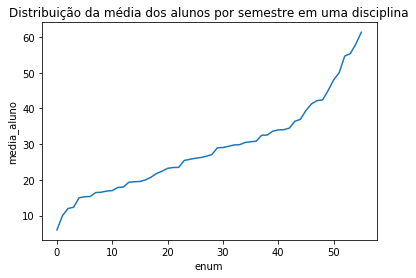

In [18]:
resultado_plot = resultado.sort_values(by='media_aluno')[['media_aluno']]
resultado_plot = resultado_plot.reset_index()
resultado_plot['enum'] = resultado_plot.index
resultado_plot['media_aluno'] = resultado_plot['media_aluno']

sns.lineplot(x='enum', y='media_aluno',data=resultado_plot).set_title('Distribuição da média dos alunos por semestre em uma disciplina')

In [20]:
# 5. Tempo médio de conclusão de curso por semestre
concluintes = df[['id', 'data_colacao_grau', 'idade_ingresso_universidade', 'idade_colacao_grau' ]]
concluintes = concluintes.drop_duplicates(subset='id')
concluintes = concluintes.dropna()
concluintes['tempo_conclusao'] = concluintes['idade_colacao_grau'] - concluintes['idade_ingresso_universidade']

semestre = [list(map(int, i.split('-'))) for i in concluintes['data_colacao_grau'].tolist()]
concluintes['semestre_concluinte'] = [(str(i[0]) + '.1' if i[1] >= 6 else str(i[0]-1) + '.2') for i in semestre]
concluintes['semestre_concluinte'] = [(str(i[0]) + '.1' if i[1] >= 6 else str(i[0]-1) + '.2') for i in semestre]

media_conclusao = concluintes.groupby(by=['semestre_concluinte'])['tempo_conclusao'].mean()
media_conclusao = pd.DataFrame(media_conclusao, columns = ['tempo_conclusao']) 
resultado = media_conclusao
resultado.head()

,tempo_conclusao
semestre_concluinte,
2009.1,1.000000
2010.2,3.000000
2011.1,3.000000
2011.2,3.888889
2012.1,3.000000


Text(0.5, 1.0, 'Distribuição da média do tempo de conclusão de curso por semestre')

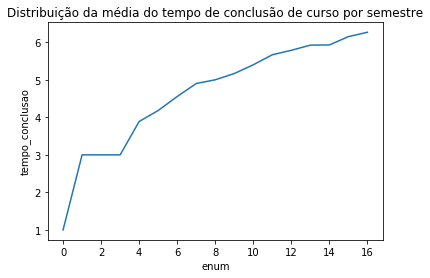

In [21]:
resultado_plot = resultado.sort_values(by='tempo_conclusao')[['tempo_conclusao']]
resultado_plot = resultado_plot.reset_index()
resultado_plot['enum'] = resultado_plot.index
resultado_plot['tempo_conclusao'] = resultado_plot['tempo_conclusao']

sns.lineplot(x='enum', y='tempo_conclusao',data=resultado_plot).set_title('Distribuição da média do tempo de conclusão de curso por semestre')

In [12]:
# 6.Idade de ingresso por tempo de conclusão.

idade = df[['id', 'idade_ingresso_universidade', 'idade_colacao_grau']]
idade.drop_duplicates().dropna(how='any').head()
count_idade = idade.groupby(by=['idade_ingresso_universidade','idade_colacao_grau']).count()
count_idade = count_idade.reset_index(level=[0,1])
count_idade.head()

,idade_ingresso_universidade,idade_colacao_grau,id
0,16,21.0,48
1,17,21.0,236
2,17,22.0,243
3,17,23.0,200
4,17,24.0,285


Text(0.5, 1, 'Idade de ingresso por tempo de conclusão')

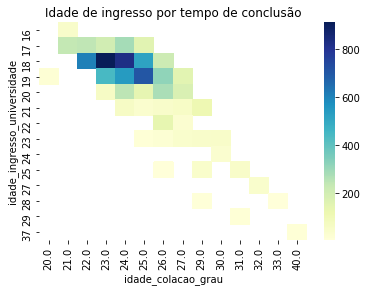

In [13]:
piv = pd.pivot_table(count_idade,values='id', index=['idade_ingresso_universidade'], columns='idade_colacao_grau')
sns.heatmap(piv, cmap="YlGnBu").set_title('Idade de ingresso por tempo de conclusão')

In [14]:
# 7.Porcentagem de aderência ao fluxo (porcentagem de matérias cursada conforme sugerido no fluxo) por aluno.

por = df[['id', 'semestre_previsto_componente', 'semestre_cursado']]
por['diff'] = por['semestre_previsto_componente'] - por['semestre_cursado']


por['diff'] = por['diff'].apply(lambda x: 1 if x == 0 else 0)
total = por.groupby('id').count()
#no_fluxo
no_fluxo = por.groupby('id').sum()


no_fluxo['diff'] = no_fluxo['diff'].divide(total['diff'], fill_value=0.0)
no_fluxo['id'] = no_fluxo.index
resultado = no_fluxo[['id', 'diff']]
resultado = resultado.rename(columns={'diff': 'porcentagem'})
resultado.head()

,id,porcentagem
id,,
1,1,0.035714
2,2,0.575000
3,3,0.782609
4,4,0.312500
5,5,0.468085


Text(0.5, 1.0, 'Distribuição da porcentagem de aderência ao fluxo')

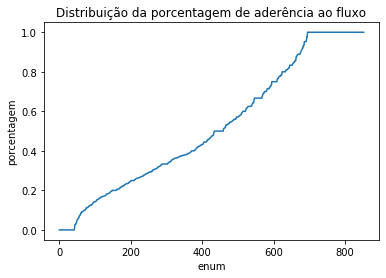

In [15]:
resultado_plot = resultado.sort_values(by='porcentagem')[['porcentagem']]
resultado_plot = resultado_plot.reset_index()
resultado_plot['enum'] = resultado_plot.index

sns.lineplot(x='enum', y='porcentagem',data=resultado_plot).set_title('Distribuição da porcentagem de aderência ao fluxo')